**Importing the Necessary Libraries**

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

**Loading and Preprocessing MNIST Data**

In [43]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

**Train Test Split**

In [44]:
test_images,val_images,test_labels,val_labels=train_test_split(test_images,test_labels,test_size=0.5,random_state=42)

In [45]:
train_images = train_images.astype('float32') / 255
train_images = np.reshape(train_images, (len(train_images), 28, 28, 1))

test_images = test_images.astype('float32') / 255
test_images = np.reshape(test_images, (len(test_images), 28, 28, 1))

In [46]:
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)

(60000, 28, 28, 1)
(5000, 28, 28, 1)
(5000, 28, 28)


In [47]:
print(train_labels.shape)
print(test_labels.shape)
print(val_labels.shape)

(60000,)
(5000,)
(5000,)


**Creating a Neural Network Architecture**



In [48]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

#connecting the fully connected layers to the feature maps
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

**Compiling the Model**

In [49]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Training the Model**

In [50]:
history=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1230 - accuracy: 0.9628 - val_loss: 0.0431 - val_accuracy: 0.9866
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0467 - accuracy: 0.9854 - val_loss: 0.0353 - val_accuracy: 0.9890
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0316 - accuracy: 0.9900 - val_loss: 0.0315 - val_accuracy: 0.9918
Epoch 4/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0247 - accuracy: 0.9924 - val_loss: 0.0346 - val_accuracy: 0.9904
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.0337 - val_accuracy: 0.9914
Epoch 6/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0155 - accuracy: 0.9947 - val_loss: 0.0334 - val_accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.0348 -

**Model Summary**

In [51]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_6 (Flatten)         (None, 9216)              0         
                                                                 
 dense_12 (Dense)            (None, 256)               2359552   
                                                      

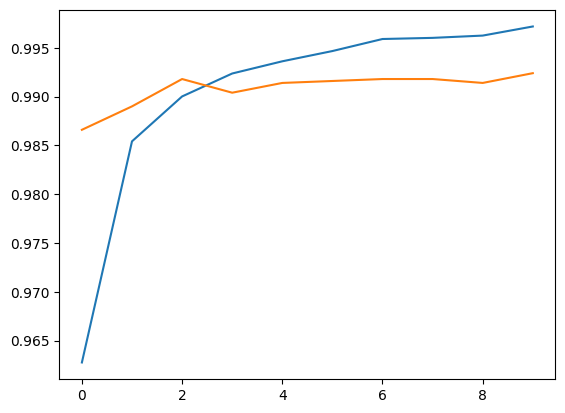

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

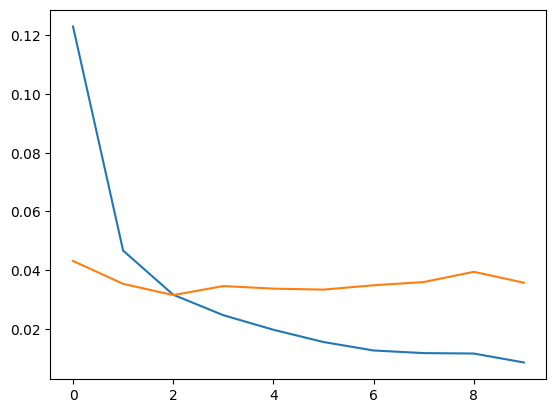

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

**Evaluating Model on Test data**

In [54]:
test_loss,test_acc=model.evaluate(test_images,test_labels)

157/157 [==============================] - 1s 4ms/step - loss: 0.0357 - accuracy: 0.9924


In [55]:
print("Test Accuracy:{}".format(test_acc))
print("Test Loss:{}".format(test_loss))

Test Accuracy:0.9923999905586243
Test Loss:0.03571977838873863


In [56]:
predicted_labels=model.predict(test_images)
predicted_labels=np.argmax(predicted_labels,axis=1)

class_report=classification_report(test_labels,predicted_labels)
print(class_report)

157/157 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       486
           1       0.99      0.99      0.99       574
           2       0.99      0.99      0.99       508
           3       1.00      1.00      1.00       487
           4       1.00      0.99      1.00       481
           5       0.99      0.99      0.99       477
           6       0.99      0.99      0.99       464
           7       0.99      0.99      0.99       532
           8       0.99      0.99      0.99       494
           9       1.00      0.99      0.99       497

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



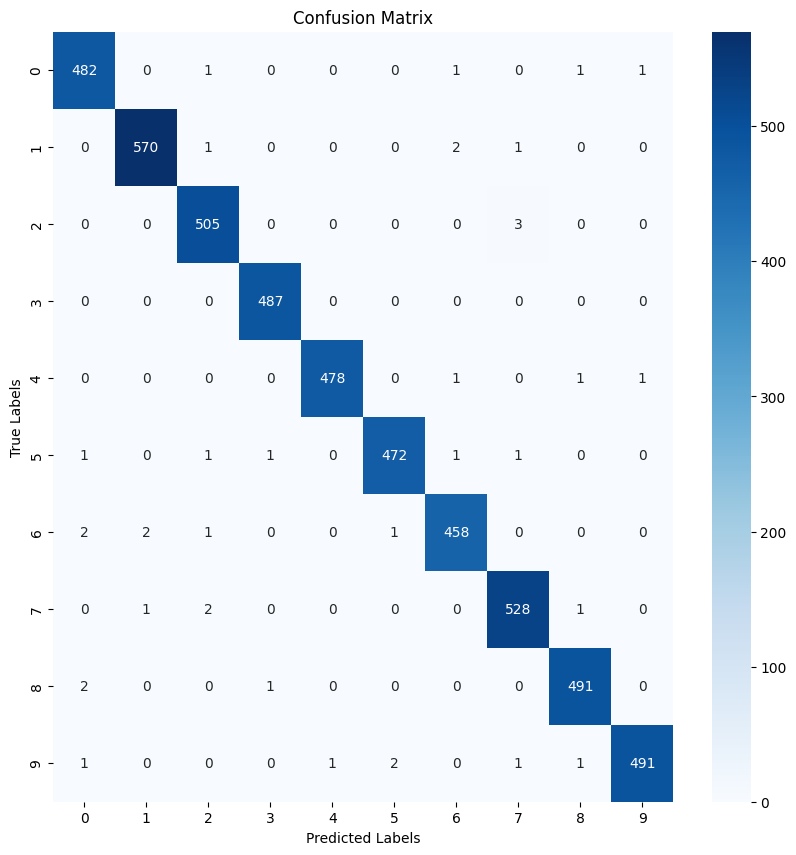

In [57]:
conf_matrix=confusion_matrix(test_labels,predicted_labels)
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=range(10),yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Data Augmentation**

In [58]:
img=ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest'
)

In [75]:
#reshape val_images to include the channel dimension
if val_images.ndim==3:
  val_images=np.expand_dims(val_images,-1)

#now we can use flow method
test_datagen=img.flow(val_images,val_labels)

In [76]:
val_images.shape

(5000, 28, 28, 1)

**Created a Neural Network Architecture**

In [80]:
model1=Sequential()
model1.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model1.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))
model1.add(Flatten())

#connecting the fully connected layers to the feature maps
model1.add(Dense(256,activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(10,activation='softmax'))

**Compiling the Model**

In [81]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Training the data using augmentated data**

In [82]:
history1=model1.fit(test_datagen,epochs=10,validation_data=(val_images,val_labels))

Epoch 1/10
157/157 [==============================] - 4s 22ms/step - loss: 4.1703 - accuracy: 0.6476 - val_loss: 0.1816 - val_accuracy: 0.9442
Epoch 2/10
157/157 [==============================] - 3s 21ms/step - loss: 0.4145 - accuracy: 0.8664 - val_loss: 0.1058 - val_accuracy: 0.9670
Epoch 3/10
157/157 [==============================] - 3s 21ms/step - loss: 0.3283 - accuracy: 0.8942 - val_loss: 0.0818 - val_accuracy: 0.9750
Epoch 4/10
157/157 [==============================] - 3s 21ms/step - loss: 0.2851 - accuracy: 0.9146 - val_loss: 0.0748 - val_accuracy: 0.9748
Epoch 5/10
157/157 [==============================] - 3s 21ms/step - loss: 0.2363 - accuracy: 0.9298 - val_loss: 0.0582 - val_accuracy: 0.9810
Epoch 6/10
157/157 [==============================] - 3s 21ms/step - loss: 0.2253 - accuracy: 0.9306 - val_loss: 0.0786 - val_accuracy: 0.9742
Epoch 7/10
157/157 [==============================] - 3s 21ms/step - loss: 0.2148 - accuracy: 0.9370 - val_loss: 0.0486 - val_accuracy: 0.9846

In [83]:
test_loss,test_acc=model1.evaluate(val_images,val_labels)

157/157 [==============================] - 1s 4ms/step - loss: 0.0410 - accuracy: 0.9864
